In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt


import requests as req
url =("https://archive.ics.uci.edu/static/public/292/wholesale+customers.zip")
filename="test.zip"
testf=req.get(url)
open(filename, 'wb').write(testf.content)

15175

In [2]:
import zipfile
zip = zipfile.ZipFile(filename)
zip.extractall()

dataset = pd.read_csv('Wholesale customers data.csv')
dataset

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [6]:
def Kmeans(clusters, data):
    def initialize_centroids(data, clusters):
        dataset_array = data.to_numpy()
        centroids = dataset_array[np.random.choice(dataset_array.shape[0], size=clusters, replace=False)]
        return centroids, dataset_array
    
    
    
    #assignment    
    def assignment(data, centroids, clusters):
        rows, dim = data.shape
        beta = 0.001

        # Compute pairwise Euclidean distances between data points and centroids
        distances = np.sqrt(np.sum((data[:, np.newaxis] - centroids) ** 2, axis=2))

        # Compute the numerator and denominator for each data point
        numerator = np.exp(-beta * distances)
        denominator = np.sum(numerator, axis=1, keepdims=True)

        # Calculate the responsibilities using the softmax function
        arrs = numerator / denominator

        return arrs
        
        
    
        #update step
    def updateCentroids(result, data, clusters):
        new_centroids = []

        for j in range(clusters):
            weighted_sum = np.dot(result[:, j], data)
            total_weight = np.sum(result[:, j])

            new_centroid = weighted_sum / total_weight if total_weight != 0 else np.zeros(data.shape[1])
            new_centroids.append(new_centroid)

        return np.array(new_centroids)
    
    centroids, dataset_array = initialize_centroids(data, clusters)
    max_iters=100
    for _ in range(max_iters):
        # 할당 단계
        result = assignment(dataset_array, centroids, clusters)

        # 업데이트 스텝
        new_centroids = updateCentroids(result, dataset_array, clusters)

        # 수렴 여부 확인
        if np.allclose(new_centroids, centroids):
            break

        # 중심 갱신
        centroids = new_centroids
        
    # 각 데이터 포인트에 할당된 클러스터 맵
    cluster_map = np.argmax(result, axis=1)

    return centroids, cluster_map

In [7]:
centroids, cluster_map = Kmeans(5, dataset)

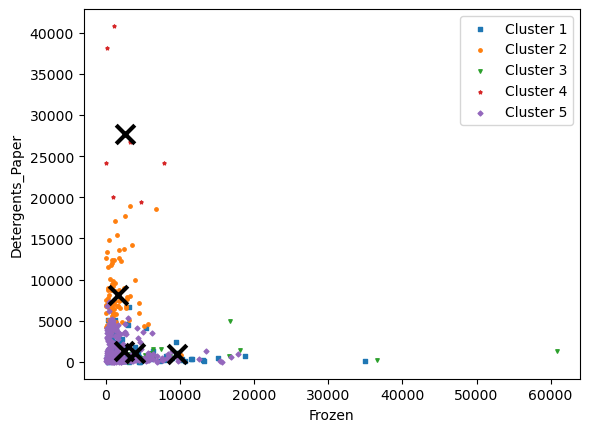

In [8]:
markers = ('s', 'o', 'v', '*', 'D', '+', 'p', '<', '>', 'x')
colors = ('C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9')

def plot_kmeans(pred, centroids, x_name, y_name, x_idx, y_idx, k,df):
    for i in range(0, k):
        plt.scatter(df[x_name].loc[pred == i], df[y_name].loc[pred == i], s=6,
                    c=colors[i], marker=markers[i], label='Cluster %d' % (i + 1))

    plt.scatter(centroids[:, x_idx], centroids[:, y_idx],
                marker='x', s=180, linewidths=3,
                color='k', zorder=10)

    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.legend()
    plt.show()
    plt.close()
    
plot_kmeans(cluster_map, centroids, 'Frozen', 'Detergents_Paper', 5, 6, 5,dataset)